In [1]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import keras


In [2]:
import os

directorio = '../Tumors'
nombres_carpetas = [nombre for nombre in os.listdir(
    directorio) if os.path.isdir(os.path.join(directorio, nombre))]

diccionario_carpetas = {}

for i, nombre in enumerate(nombres_carpetas):
    diccionario_carpetas[i] = nombre

print(diccionario_carpetas)


{0: 'glioma', 1: 'meningioma', 2: 'notumor', 3: 'pituitary'}


In [3]:
def predict(img_rel_path, model):

    loaded_model = keras.models.load_model(model)

    img_real = image.load_img(img_rel_path)

    img = image.load_img(img_rel_path, target_size=(256, 256))

    img = image.img_to_array(img, dtype=np.uint8)

    img = np.array(img)/255.0

    p = loaded_model.predict(img[np.newaxis, ...])

    labels = diccionario_carpetas

    predicted_class = labels[np.argmax(p[0], axis=-1)]

    classes = []
    prob = []

    for i, j in enumerate(p[0], 0):
        classes.append(labels[i])
        prob.append(round(j * 100, 2))
    sorted_probs = sorted(zip(classes, prob), key=lambda x: x[1], reverse=True)
    top_classes = [item[0] for item in sorted_probs[:4]]
    top_probs = [item[1] for item in sorted_probs[:4]]
    for i in range(4):
        print(f"{top_classes[i]} - {top_probs[i]}%")
    plt.title("Es " + predicted_class)
    plt.axis('off')
    plt.imshow(img_real)
    plt.show()

    def plot_bar_x():
        index = np.arange(len(top_classes))
        plt.bar(index, top_probs)
        plt.xlabel('Tipo tumor', fontsize=8)
        plt.ylabel('Probabilidad', fontsize=8)
        plt.xticks(index, top_classes, fontsize=8, rotation=20)
        plt.title('Gráfico de probabilidades')
        plt.show()

    plot_bar_x()


1/1 [==============================] - 0s 394ms/step
notumor - 96.49%
meningioma - 3.39%
pituitary - 0.1%
glioma - 0.02%


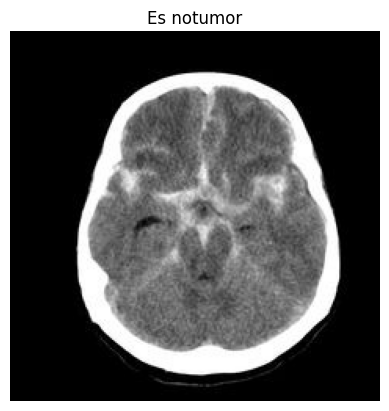

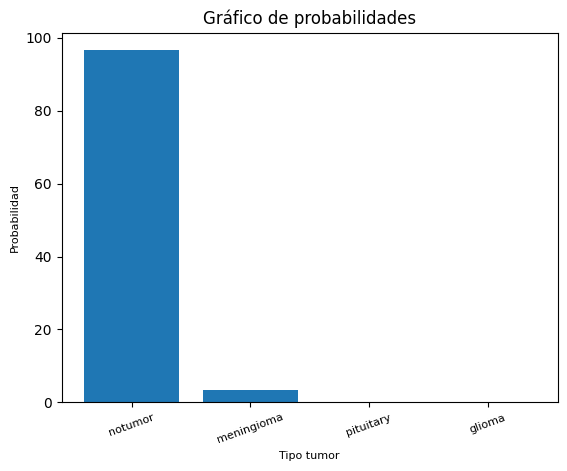

In [4]:
img_face = "../ImagenesPrueba/notumor (3).jpg"  # Imagen a clasificar
n_model = "../Modelos/model3.h5"  # Modelo a usar

predict(img_face, n_model)
